# K-Nearest Neighbors (K-NN) Algorithm for Regression - BigMart Sales

## 1. Read the Data

In [1]:
#  Read the Dataset (For Training)

import pandas as pd

df = pd.read_csv('BigMart_Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [3]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## 2. Impute missing values

###### Item_Weight and Outlet_Size have missing values. It needs to be imputed

In [4]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
#imputing item_weight with mean
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

#imputing outlet size with mode
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


## 3.  Handle Categorical Data 

###### Convert categorical variable into dummy/indicator variables

In [7]:
# Drop the insignificant ID Columns

df.drop(['Item_Identifier','Outlet_Identifier'], inplace=True, axis=1)

In [8]:
## using get_dummies - Convert categorical variable into dummy/indicator variables

df = pd.get_dummies(df)
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


## 4. Create Train and Test Sets

In [9]:
# Separate the Input Variables & Target Variables

X = df.drop(['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

#X = df.iloc[:, :-1].values
#y = df.iloc[:, 1].values

In [10]:
# split data into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## 5. Preprocessing – Scaling the features

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

X_train_scaled = scaler.fit_transform(X_train)
X_train        = pd.DataFrame(X_train_scaled)

X_test_scaled  = scaler.fit_transform(X_test)
X_test         = pd.DataFrame(X_test_scaled)

C:\Users\750010524\AnacondaInstall\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\750010524\AnacondaInstall\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## 6. Fit & Predict the Model and check the error rate for different K Values

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,accuracy_score
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
rmse_val = []                             #To store rmse values for different k
for K in range(20):
    K = K + 1
    model = KNeighborsRegressor(n_neighbors=K)
    
    model.fit(X_train, y_train)       #fit the model
    y_pred = model.predict(X_test)    #prediction on Test set
    error = sqrt(mean_squared_error(y_test, y_pred))      #calculate rmse
    rmse_val.append(error)            #store rmse values
    print('RMSE value for K= ', K, ':is', error)

RMSE value for K=  1 :is 1576.336482293742
RMSE value for K=  2 :is 1378.4803467918423
RMSE value for K=  3 :is 1311.9726937636237
RMSE value for K=  4 :is 1290.2544630182795
RMSE value for K=  5 :is 1275.6764056860945
RMSE value for K=  6 :is 1254.7134938324716
RMSE value for K=  7 :is 1244.2676802863064
RMSE value for K=  8 :is 1243.0293379124666
RMSE value for K=  9 :is 1233.4282906528945
RMSE value for K=  10 :is 1239.3152684232318
RMSE value for K=  11 :is 1237.8240042968062
RMSE value for K=  12 :is 1240.8584221986534
RMSE value for K=  13 :is 1243.9805715619323
RMSE value for K=  14 :is 1245.4188728692206
RMSE value for K=  15 :is 1243.7464662443567
RMSE value for K=  16 :is 1245.5165085806136
RMSE value for K=  17 :is 1252.5473273417317
RMSE value for K=  18 :is 1256.8725352877943
RMSE value for K=  19 :is 1263.7960531822744
RMSE value for K=  20 :is 1266.6431151410554


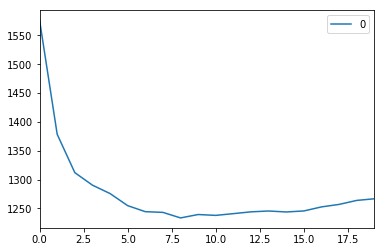

In [14]:
# Plot the Graph for K Values

curve = pd.DataFrame(rmse_val)  # Elbow Curve
curve.plot()

## 7. Implementing GridsearchCV

In [15]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors':[6,7,8,9,10,11,12]}

knn = KNeighborsRegressor()

model1 = GridSearchCV(knn, params, cv=5)
model1.fit(X_train, y_train)
model1.best_params_

{'n_neighbors': 7}